In [1]:
from sympy import *
init_printing()
%matplotlib inline

In [2]:
x, y, theta, u, v = symbols("x y theta u v", real=True)
g = symbols("g", real=True, positive=True)

In [73]:
# we want to find the minimum distance from an edge pixel to the grid with size g (pixels),
# offset u, v (pixels), and angle theta

# distance to grid will be the minimum of distances to the nearest gridline
# (rounding (x-u, y-v) % g toward zero) after counter-rotation
S, C = sin(theta), cos(theta)
R = Matrix([[C, -S], [S, C]])
Dxy = Abs((R*Matrix([[x], [y]]) - Matrix([[u - g/2], [v - g/2]])) % g - Matrix([[g/2], [g/2]]))
D = Min(Dxy[0], Dxy[1])

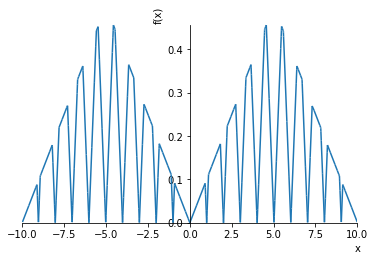

In [74]:
plot(D.subs([(g, 1), (u, 0), (v, 0), (theta, 0.1), (y, 0)]))

In [75]:
cse(diff(D, theta))

⎛⎡                                               ⎛    g⎞                      
⎜⎢(x₀, cos(θ)), (x₁, sin(θ)), (x₂, x⋅x₀ - x₁⋅y), ⎜x₃, ─⎟, (x₄, x⋅x₁), (x₅, x₀⋅
⎝⎣                                               ⎝    2⎠                      

                                                                              
y), (x₆, -x₁₀ + x₃ + x₄ + x₅), (x₇, x₃ - (x₆ mod g)), (x₈, -u + x₂ + x₃), (x₉,
                                                                              

                                           ⎤  ⎡                               
 x₃ - (x₈ mod g)), (x₁₁, │x₉│), (x₁₂, │x₇│)⎥, ⎢- x₂⋅Heaviside(x₁₁ - x₁₂)⋅sign(
                                           ⎦  ⎣                               

    ⎛ ∂           ⎞│                                                  ⎛ ∂     
x₇)⋅⎜───(ξ₁ mod g)⎟│      - (-x₄ - x₅)⋅Heaviside(-x₁₁ + x₁₂)⋅sign(x₉)⋅⎜───(ξ₁ 
    ⎝∂ξ₁          ⎠│ξ₁=x₆                                             ⎝∂ξ₁    

      ⎞│     ⎤⎞
mod g)⎟│     ⎥⎟
      ⎠│ξ₁=x₈⎦⎠

In [22]:
dx, dy, ds = symbols("dx dy ds", real=True)
diff(abs(dx * cos(theta) + dy * sin(theta)), theta)

In [25]:
print_python(diff((dx * cos(theta) + dy * sin(theta))**2, theta))

dx = Symbol('dx')
theta = Symbol('theta')
dy = Symbol('dy')
e = (-2*dx*sin(theta) + 2*dy*cos(theta))*(dx*cos(theta) + dy*sin(theta))


In [23]:
Ix, Iy = Function("Ix", real=True), Function("Iy", real=True)  # x and y image gradients
diff(abs(Ix(x, y) - Ix(x + ds*cos(theta), y + ds*sin(theta))), theta)

⎛          ⎛ ∂                        ⎞│                             ⎛ ∂      
⎜ds⋅sin(θ)⋅⎜───(Ix(ξ₁, ds⋅sin(θ) + y))⎟│                 - ds⋅cos(θ)⋅⎜───(Ix(d
⎝          ⎝∂ξ₁                       ⎠│ξ₁=ds⋅cos(θ) + x             ⎝∂ξ₂     

                  ⎞│                ⎞                                         
s⋅cos(θ) + x, ξ₂))⎟│                ⎟⋅sign(Ix(x, y) - Ix(ds⋅cos(θ) + x, ds⋅sin
                  ⎠│ξ₂=ds⋅sin(θ) + y⎠                                         

         
(θ) + y))
         

In [34]:
obj = Min(Abs(dx * cos(theta) + dy * sin(theta)),
         Abs(dy * cos(theta) - dx * sin(theta)))
simplify(diff(obj, theta))

In [33]:
print_python(cse(Out[30]))

x0 = Symbol('x0')
theta = Symbol('theta')
x1 = Symbol('x1')
x2 = Symbol('x2')
dx = Symbol('dx')
dy = Symbol('dy')
x3 = Symbol('x3')
x4 = Symbol('x4')
x5 = Symbol('x5')
e = ([(x0, cos(theta)), (x1, sin(theta)), (x2, dx*x0 + dy*x1), (x3, dx*x1 - dy*x0), (x4, Abs(x2)), (x5, Abs(x3))], [x2*Heaviside(x4 - x5)*sign(x3) - x3*Heaviside(-x4 + x5)*sign(x2)])


In [35]:
simplify(diff(obj, theta, theta))

In [65]:
vs, es = cse([obj, diff(obj, theta), diff(obj, (theta, 2))])
for v, e in vs:
    print(v, '=', e)
for e in es:
    print('=', e)

x0 = cos(theta)
x1 = sin(theta)
x2 = dx*x0 + dy*x1
x3 = Abs(x2)
x4 = dx*x1
x5 = dy*x0
x6 = x4 - x5
x7 = Abs(x6)
x8 = sign(x2)
x9 = -x3 + x7
x10 = Heaviside(x9)
x11 = x10*x8
x12 = Heaviside(x3 - x7)
x13 = sign(x6)
x14 = x13*x2
x15 = x6*x8
x16 = (x14 + x15)*DiracDelta(x9)
= Min(x3, x7)
= x11*(-x4 + x5) + x12*x14
= 2*x10*x6**2*DiracDelta(x2) - x11*x2 - x12*x13*x6 + 2*x12*x2**2*DiracDelta(x6) - x14*x16 - x15*x16


In [69]:
obj = Min((dx * cos(theta) + dy * sin(theta))**2,
         (dy * cos(theta) - dx * sin(theta))**2)

vs, es = cse([obj, diff(obj, theta)])
for v, e in vs:
    print(v, '=', e)
for e in es:
    print('=', e)

x0 = cos(theta)
x1 = dx*x0
x2 = sin(theta)
x3 = dy*x2
x4 = x1 + x3
x5 = x4**2
x6 = dy*x0
x7 = dx*x2
x8 = x6 - x7
x9 = x8**2
x10 = -x5
x11 = (-x6 + x7)**2
x12 = Heaviside(-x11 + x5)
x13 = x10 + x11
x14 = Heaviside(x13)
= Min(x5, x9)
= x4*(2*x6 - 2*x7)*Heaviside(x10 + x9) + x8*(-2*x1 - 2*x3)*Heaviside(x5 - x9)
= -2*x11*x12 + 2*x11*x14 - 16*x11*x5*DiracDelta(x13) + 2*x12*x5 - 2*x14*x5


In [71]:
delta = symbols("delta")  # huber loss


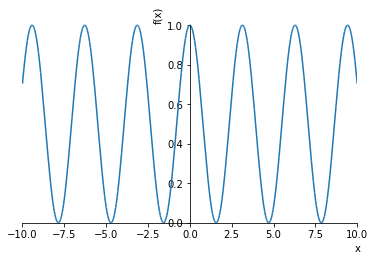

In [82]:
# p(Ix(x) | x, u, g) = Ix*cos((x-u)*2pi/g)**2
plot(cos(x)**2)

In [91]:
# f = 2*pi/g  - frequency in rad/pix instead of period in pixels
f = symbols("f", real=True, positive=True)
obj2 = Ix(x)*cos((x-u)*f)**2
vs, es = cse([obj2, diff(obj2, u), diff(obj2, f)])
for v, e in vs:
    print(v, '=', e)
for e in es:
    print('=', e)

x0 = Ix(x)
x1 = -u + x
x2 = f*x1
x3 = cos(x2)
x4 = 2*x0*x3*sin(x2)
= x0*x3**2
= f*x4
= -x1*x4


In [98]:
# hang on, this is just weighted least squares, residual is sin(f*(x-u)), weight is Ix(x)
r = sin(f*(x-u))
J = Matrix([r]).jacobian(Matrix([u, f]))
r, J

(sin(f⋅(-u + x)), [-f⋅cos(f⋅(-u + x))  (-u + x)⋅cos(f⋅(-u + x))])

In [99]:
vs, es = cse([r, J])
for v, e in vs:
    print(v, '=', e)
for e in es:
    print('=', e)

x0 = -u + x
x1 = f*x0
x2 = cos(x1)
= sin(x1)
= Matrix([[-f*x2, x0*x2]])


In [100]:
# problem: the incentive is for f to = 0, and then everything is solved
# we need to encourage a match better
r = sin(f*(x-u))
J = Matrix([r]).jacobian(Matrix([u]))
r, J

(sin(f⋅(-u + x)), [-f⋅cos(f⋅(-u + x))])

In [111]:
pu, pv = symbols("p_u p_v", real=True)

S, C = sin(theta), cos(theta)
R*Matrix([pu, pv]) + Matrix([x, y])

⎡pᵤ⋅cos(θ) - pᵥ⋅sin(θ) + x⎤
⎢                         ⎥
⎣pᵤ⋅sin(θ) + pᵥ⋅cos(θ) + y⎦

In [ ]:
(R*Matrix([pu, pv]) + Matrix([x, y])).jacobian(Matrix([theta, x, y]))